## Data structures

GeoPandas implements two main data structures, a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) and a [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame). These are subclasses of [`pandas.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) and [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame), respectively.

### GeoSeries

A [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).

GeoPandas has three basic classes of geometric objects (which are actually shapely objects):

- Points / Multi-Points
- Lines / Multi-Lines
- Polygons / Multi-Polygons

Note that all entries in a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) need not be of the same geometric type, although certain export operations will fail if this is not the case.


### GeoDataFrame

A [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame) is a tabular data structure that contains a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries).

The most important property of a [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame) is that it always has one [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) column that holds a special status. This [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) is referred to as the [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame)’s “geometry”. When a spatial method is applied to a [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame) (or a spatial attribute like *`area`* is called), this commands will always act on the “geometry” column.

The “geometry” column – no matter its name – can be accessed through the *`geometry`* attribute (*`gdf.geometry`*), and the name of the *`geometry`* column can be found by typing *`gdf.geometry.name`*.

A [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame) may also contain other columns with geometrical (shapely) objects, but only one column can be the active geometry at a time. To change which column is the active geometry column, use the [`GeoDataFrame.set_geometry()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_geometry.html#geopandas.GeoDataFrame.set_geometry) method.

An example using the *`geoda.malaria`* dataset from *`geodatasets`* containing the counties of Colombia:

In [2]:
import geopandas
import geodatasets
import matplotlib.pyplot as plt

In [ ]:
geodatasets.get_path('geoda.malaria')

In [4]:
geodatasets.get_url('geoda.malaria')

'https://geodacenter.github.io/data-and-lab//data/malariacolomb.zip'

In [5]:
colombia = geopandas.read_file(geodatasets.get_path('geoda.malaria'))
colombia.head()

,ID,ADM0,ADM1,ADM2,CODDEPT,IDDANE,DANECODE,TP1973,UP1973,RP1973,...,TP2003,UP2003,RP2003,TP2004,UP2004,RP2004,TP2005,UP2005,RP2005,geometry
0,1,COLOMBIA,Guajira,URIBIA,44,44847,44847,57815,2881,54934,...,67709,6682,61027,68458,7053,61405,69203,7430,61773,"POLYGON ((-71.32639 11.84789, -71.33579 11.855..."
1,2,COLOMBIA,Guajira,MANAURE,44,44560,44560,5661,4074,1587,...,42371,8548,33823,44229,9096,35133,46134,9669,36465,"POLYGON ((-72.42191 11.79824, -72.41980 11.795..."
2,3,COLOMBIA,Guajira,MAICAO,44,44430,44430,36771,25161,11610,...,140121,122435,17686,144277,126249,18028,148517,130149,18368,"POLYGON ((-72.18910 11.52420, -72.18330 11.532..."
3,4,COLOMBIA,Guajira,RIOHACHA,44,44001,44001,46024,22545,23479,...,98318,90883,7435,98909,91408,7501,99472,91906,7566,"POLYGON ((-72.63800 11.36790, -72.62590 11.349..."
4,5,COLOMBIA,Magdalena,SITIONUEVO,47,47745,47745,16493,6289,10204,...,21058,11646,9412,21101,11723,9378,21143,11800,9343,"POLYGON ((-74.77489 10.93158, -74.77530 10.933..."


<Axes: >

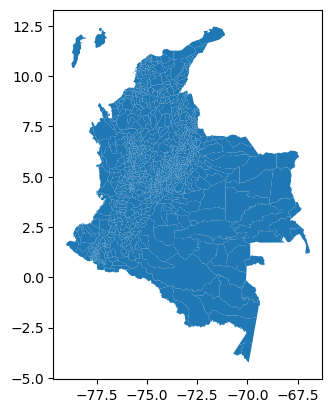

In [10]:
# Plot countries
colombia.plot(markersize=0.5)

In [11]:
colombia.geometry

0       POLYGON ((-71.32639 11.84789, -71.33579 11.855...
1       POLYGON ((-72.42191 11.79824, -72.41980 11.795...
2       POLYGON ((-72.18910 11.52420, -72.18330 11.532...
3       POLYGON ((-72.63800 11.36790, -72.62590 11.349...
4       POLYGON ((-74.77489 10.93158, -74.77530 10.933...
                              ...                        
1063    POLYGON ((-77.11370 0.41700, -77.06590 0.48780...
1064    MULTIPOLYGON (((-75.33747 10.69339, -75.31290 ...
1065    MULTIPOLYGON (((-78.26750 12.06320, -78.25940 ...
1066    MULTIPOLYGON (((-75.93092 9.42257, -75.93809 9...
1067    MULTIPOLYGON (((-77.24330 12.39450, -77.24390 ...
Name: geometry, Length: 1068, dtype: geometry

In [12]:
colombia.geometry.name

'geometry'

In [14]:
colombia = colombia.rename_geometry('borders')
colombia.head()

,ID,ADM0,ADM1,ADM2,CODDEPT,IDDANE,DANECODE,TP1973,UP1973,RP1973,...,TP2003,UP2003,RP2003,TP2004,UP2004,RP2004,TP2005,UP2005,RP2005,borders
0,1,COLOMBIA,Guajira,URIBIA,44,44847,44847,57815,2881,54934,...,67709,6682,61027,68458,7053,61405,69203,7430,61773,"POLYGON ((-71.32639 11.84789, -71.33579 11.855..."
1,2,COLOMBIA,Guajira,MANAURE,44,44560,44560,5661,4074,1587,...,42371,8548,33823,44229,9096,35133,46134,9669,36465,"POLYGON ((-72.42191 11.79824, -72.41980 11.795..."
2,3,COLOMBIA,Guajira,MAICAO,44,44430,44430,36771,25161,11610,...,140121,122435,17686,144277,126249,18028,148517,130149,18368,"POLYGON ((-72.18910 11.52420, -72.18330 11.532..."
3,4,COLOMBIA,Guajira,RIOHACHA,44,44001,44001,46024,22545,23479,...,98318,90883,7435,98909,91408,7501,99472,91906,7566,"POLYGON ((-72.63800 11.36790, -72.62590 11.349..."
4,5,COLOMBIA,Magdalena,SITIONUEVO,47,47745,47745,16493,6289,10204,...,21058,11646,9412,21101,11723,9378,21143,11800,9343,"POLYGON ((-74.77489 10.93158, -74.77530 10.933..."


In [15]:
colombia.geometry.name

'borders'

In [ ]:
colombia['centroid_column'] = colombia.centroid

<Axes: >

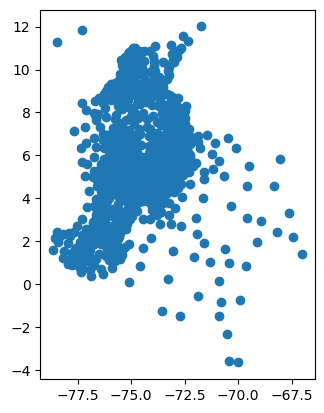

In [24]:
colombia = colombia.set_geometry('centroid_column')
colombia.plot()

Note: A [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame) keeps track of the active column by name, so if you rename the active geometry column, you must also reset the geometry:

```python
gdf = gdf.rename(columns={'old_name': 'new_name'}).set_geometry('new_name')
```

Note 2: Somewhat confusingly, by default when you use the [`read_file()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html#geopandas.read_file) command, the column containing spatial objects from the file is named “geometry” by default, and will be set as the active geometry column. However, despite using the same term for the name of the column and the name of the special attribute that keeps track of the active column, they are distinct. You can easily shift the active geometry column to a different [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) with the [`set_geometry()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_geometry.html#geopandas.GeoDataFrame.set_geometry) command. Further, *`gdf.geometry`* will always return the active geometry column, not the column named *`geometry`*. If you wish to call a column named “geometry”, and a different column is the active geometry column, use *`gdf['geometry']`*, not *`gdf.geometry`*.

### Attributes and methods

Any of the attributes calls or methods described for a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) will work on a [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame) – effectively, they are just applied to the “geometry” [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries).

However, [`GeoDataFrames`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame) also have a few extra methods for input and output which are described on the [Reading and writing files](https://geopandas.org/en/stable/docs/user_guide/io.html) page and for geocoding with are described in [Geocoding](https://geopandas.org/en/stable/docs/user_guide/geocoding.html).

### Display options

GeoPandas has an *`options`* attribute with currently a single configuration option to control:

In [26]:
geopandas.options

Options(
  display_precision: None [default: None]
      The precision (maximum number of decimals) of the coordinates in the
      WKT representation in the Series/DataFrame display. By default (None),
      it tries to infer and use 3 decimals for projected coordinates and 5
      decimals for geographic coordinates.
  use_pygeos: False [default: False]
      Whether to use PyGEOS to speed up spatial operations. The default is
      True if PyGEOS is installed, and follows the USE_PYGEOS environment
      variable if set.
  io_engine: None [default: None]
      The default engine for ``read_file`` and ``to_file``. Options are
      'pyogrio' and 'fiona'.
  )

The *`geopandas.options.display_precision`* option can control the number of decimals to show in the display of coordinates in the geometry column. In the *`colombia`* example of above, the default is to show 5 decimals for geographic coordinates:

In [27]:
colombia['centroid_column'].head()

0    POINT (-71.74594 12.00885)
1    POINT (-72.56514 11.58174)
2    POINT (-72.35203 11.32204)
3    POINT (-73.14121 11.15251)
4    POINT (-74.64555 10.88454)
Name: centroid_column, dtype: geometry

If you want to change this, for example to see more decimals, you can do:

In [30]:
geopandas.options.display_precision = 9

colombia['centroid_column'].head()

0    POINT (-71.745940217 12.008854228)
1    POINT (-72.565144214 11.581744777)
2    POINT (-72.352030378 11.322036612)
3    POINT (-73.141207300 11.152507044)
4    POINT (-74.645551117 10.884543716)
Name: centroid_column, dtype: geometry